# R Example Notebook

Adapted from

https://www.r-graph-gallery.com/183-choropleth-map-with-leaflet.html



## Download and Extract the data

In [1]:
# Download the shapefile. (note that I store it in a folder called DATA. You have to change that if needed.)
download.file("http://thematicmapping.org/downloads/TM_WORLD_BORDERS_SIMPL-0.3.zip" , destfile="DATA/world_shape_file.zip")
# You now have it in your current working directory, have a look!

[1] "DATA"                           "R-notebook.ipynb"              
[3] "Readme.txt"                     "TM_WORLD_BORDERS_SIMPL-0.3.dbf"
[5] "TM_WORLD_BORDERS_SIMPL-0.3.prj" "TM_WORLD_BORDERS_SIMPL-0.3.shp"
[7] "TM_WORLD_BORDERS_SIMPL-0.3.shx"

In [5]:
# Unzip this file. You can do it with R (as below), or clicking on the object you downloaded.

system("cd DATA; unzip -d world_shape_file world_shape_file.zip; cd ..")
#  -- > You now have 4 files. One of these files is a .shp file! (TM_WORLD_BORDERS_SIMPL-0.3.shp)

## Plot the data

In [6]:
# Read this shape file with the rgdal library. 
library(rgdal)
world_spdf <- readOGR( 
  dsn= paste0(getwd(),"/DATA/world_shape_file/") , 
  layer="TM_WORLD_BORDERS_SIMPL-0.3",
  verbose=FALSE
)

# Clean the data object
library(dplyr)
world_spdf@data$POP2005[ which(world_spdf@data$POP2005 == 0)] = NA
world_spdf@data$POP2005 <- as.numeric(as.character(world_spdf@data$POP2005)) / 1000000 %>% round(2)

# -- > Now you have a Spdf object (spatial polygon data frame). You can start doing maps!


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [28]:
# Library
library(leaflet)
library(IRdisplay)
library(htmlwidgets)

# Create a color palette for the map:
mypalette <- colorNumeric( palette="viridis", domain=world_spdf@data$POP2005, na.color="transparent")
mypalette(c(45,43))

# Basic choropleth with leaflet?
m <- leaflet(world_spdf, height="1000px") %>% 
  addTiles()  %>% 
  setView( lat=10, lng=0 , zoom=2) %>%
  addPolygons( fillColor = ~mypalette(POP2005), stroke=FALSE )


saveWidget(m, 'demo.html', selfcontained = FALSE)
display_html('<iframe src="demo.html" style="min-height: 600px; width: 100%;"></iframe>')

# save the widget in a html file if needed.
# library(htmlwidgets)
# saveWidget(m, file=paste0( getwd(), "/HtmlWidget/choroplethLeaflet1.html"))

[1] "#470E61" "#470D60"

Warning message:
“Removed 18 rows containing non-finite values (stat_bin).”


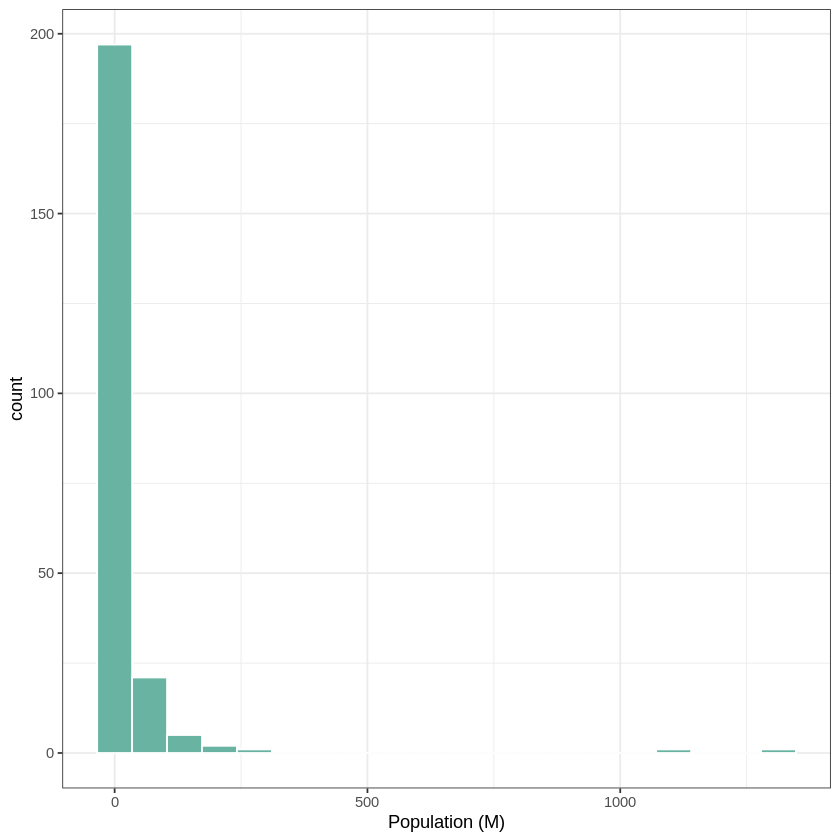

In [29]:
# load ggplot2
library(ggplot2)

# Distribution of the population per country?
world_spdf@data %>% 
  ggplot( aes(x=as.numeric(POP2005))) + 
    geom_histogram(bins=20, fill='#69b3a2', color='white') +
    xlab("Population (M)") + 
    theme_bw()

## Make the plots pretty

In [31]:
m <- leaflet(world_spdf)%>% addTiles()  %>% setView( lat=10, lng=0 , zoom=2) %>%
  addPolygons( stroke = FALSE, fillOpacity = 0.5, smoothFactor = 0.5, color = ~colorQuantile("YlOrRd", POP2005)(POP2005) )


saveWidget(m, 'demo-colorized.html', selfcontained = FALSE)
display_html('<iframe src="demo-colorized.html" style="min-height: 600px; width: 100%;"></iframe>')


## Conclusion


R and Jupyter work really well together!!! Notice that the noteboks have spellshck (two previous words will be highlighted red).

If you are not familiar with `markdown` it's a simple formatting language, kind of like what you have in confluence.

- You
- Can
- Make
- Lists

**Tables** also work. *and did you notice the bold and italics?*

| Stretch/Untouched | ProbDistribution | Accuracy |
| --- | --- | --- |
| Stretched | Gaussian | .843 |
| Stretched | Gaussian | .843 |
| Stretched | Gaussian | .843 |

[Hyperlinks also work](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)


# R-Shiny

We also have an [R-Shiny server](shiny.covid.cloud.statcan.ca)

You can add your dashboard by submitting it to [this folder](https://github.com/StatCan/shiny/tree/master/mountpoints/apps) as a Github Pull Request.

![Screenshot](shiny.png)
